In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 6.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.1 MB 3.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.1 MB 3.0 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 3.0 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.2 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/8.1 MB 2.2 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 2.2 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 2.2 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 1.8 MB/s eta 0:00:0

In [ ]:
df = pd.read_csv('placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

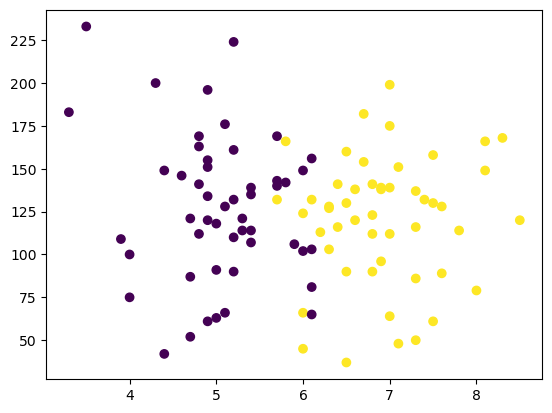

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
x = df.iloc[:,0:2]

In [ ]:
y = df.iloc[:,-1]

In [ ]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
x_train

,cgpa,iq
22,4.9,120.0
35,6.8,90.0
8,6.1,156.0
54,6.4,141.0
4,5.8,142.0
...,...,...
96,4.4,42.0
26,7.0,199.0
17,3.3,183.0
97,6.7,182.0


In [ ]:
y_train

22    0
35    1
8     0
54    1
4     0
     ..
96    0
26    1
17    0
97    1
7     0
Name: placement, Length: 90, dtype: int64

In [ ]:
x_test

,cgpa,iq
28,5.2,90.0
19,5.2,132.0
94,4.7,52.0
56,6.1,65.0
70,6.3,127.0
15,5.1,176.0
1,5.9,106.0
9,5.1,66.0
0,6.8,123.0
63,6.3,128.0


In [ ]:
y_test

28    0
19    0
94    0
56    0
70    1
15    0
1     0
9     0
0     1
63    1
Name: placement, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

array([[-0.95987098, -0.1381604 ],
       [ 0.65884635, -0.89481979],
       [ 0.06247681,  0.76983086],
       [ 0.31806376,  0.39150117],
       [-0.19311014,  0.41672315],
       [ 0.06247681, -1.1218176 ],
       [ 0.65884635, -0.33993624],
       [ 1.34041155, -0.92004177],
       [-1.72663183, -0.64259999],
       [-1.72663183, -1.27314948],
       [-0.27830579,  0.16450336],
       [ 1.2552159 , -1.62625719],
       [-0.53389274,  0.24016929],
       [-1.04506663,  1.0977166 ],
       [-1.21545793,  0.51761107],
       [ 1.2552159 ,  0.82027482],
       [-0.27830579,  1.0977166 ],
       [ 0.744042  ,  0.31583523],
       [-0.70428403,  0.89594076],
       [ 1.17002025,  0.16450336],
       [ 0.9144333 ,  0.64372097],
       [-0.78947968,  0.06361544],
       [-0.27830579,  0.36627919],
       [ 2.10717239, -0.1381604 ],
       [-0.70428403, -0.39038019],
       [ 0.48845506, -0.1381604 ],
       [ 1.0848246 , -1.90369897],
       [-0.53389274, -0.28949228],
       [-1.13026228,

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[-0.70428403, -0.89481979],
       [-0.70428403,  0.16450336],
       [-1.13026228, -1.85325501],
       [ 0.06247681, -1.52536927],
       [ 0.23286811,  0.03839346],
       [-0.78947968,  1.27427046],
       [-0.10791449, -0.49126811],
       [-0.78947968, -1.5001473 ],
       [ 0.65884635, -0.06249446],
       [ 0.23286811,  0.06361544]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_test

28    0
19    0
94    0
56    0
70    1
15    0
1     0
9     0
0     1
63    1
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

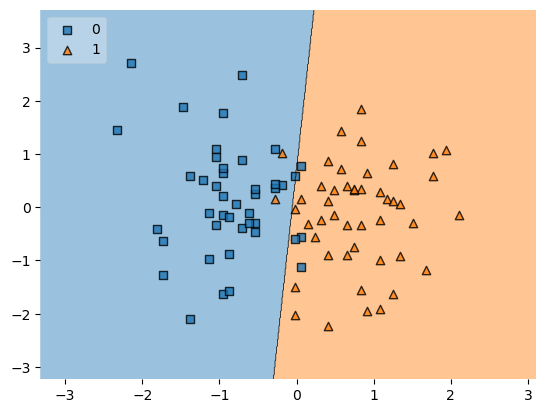

In [ ]:
plot_decision_regions(x_train,y_train.values,clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [ ]:
df.notnull()

,Unnamed: 0,cgpa,iq,placement
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
95,True,True,True,True
96,True,True,True,True
97,True,True,True,True
98,True,True,True,True


In [ ]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.corr()

,Unnamed: 0,cgpa,iq,placement
Unnamed: 0,1.000000,0.047478,-0.019080,0.144807
cgpa,0.047478,1.000000,-0.098791,0.821688
iq,-0.019080,-0.098791,1.000000,-0.083031
placement,0.144807,0.821688,-0.083031,1.000000


<Axes: ylabel='count'>

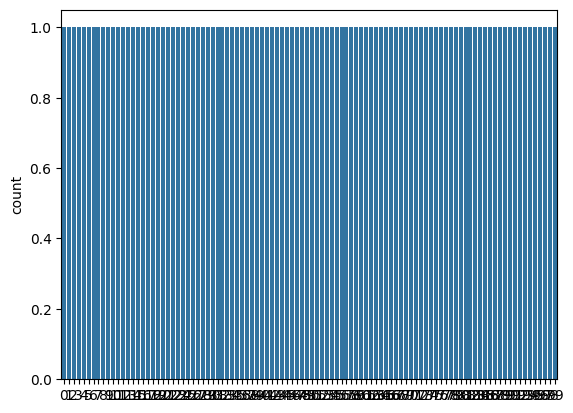

In [17]:
sns.countplot(df['iq'])